In [1]:
# !pip install requests
# !pip install bs4
# !pip install pandas

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import spacy

In [3]:
toi_url = 'https://timesofindia.indiatimes.com/india/coronavirus-live-updates-total-number-of-coronavirus-cases-in-india-rises-march-19-2020/liveblog/74701641.cms?curpg={}'

In [4]:
def get_toi_corona_live_updates(toi_url, no_of_pages_to_scrape):

    corona_news = []
    for i in range(no_of_pages_to_scrape):
        print('Scraping Data from URL: {}'.format(toi_url.format(i)))
        response = requests.get(toi_url.format(i))

        try:
            soup = BeautifulSoup(response.text,'html.parser')
            top_news_container = soup.find('div',class_ = '_3i7A1')
            for news_container in top_news_container.find_all('div',class_ = '_2tvI3'):
                news = {}
            #     news_time_tag = news_container.find('div',class_ = 'uu5Lm')
                news['datetime'] = news_container.span.text

                news_text = news_container.find('div',class_ = '_1KydD').get_text()
                news['text'] = news_text  #news_container.p.b.text
                corona_news.append(news)
                
        except:
            print('No more news at page {}'.format(i))
            break
    return corona_news

In [5]:
corona_news = get_toi_corona_live_updates( toi_url= toi_url , no_of_pages_to_scrape= 10 )

Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-live-updates-total-number-of-coronavirus-cases-in-india-rises-march-19-2020/liveblog/74701641.cms?curpg=0
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-live-updates-total-number-of-coronavirus-cases-in-india-rises-march-19-2020/liveblog/74701641.cms?curpg=1
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-live-updates-total-number-of-coronavirus-cases-in-india-rises-march-19-2020/liveblog/74701641.cms?curpg=2
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-live-updates-total-number-of-coronavirus-cases-in-india-rises-march-19-2020/liveblog/74701641.cms?curpg=3
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-live-updates-total-number-of-coronavirus-cases-in-india-rises-march-19-2020/liveblog/74701641.cms?curpg=4
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-li

In [6]:
df = pd.DataFrame(corona_news)

In [7]:
df.head()

,datetime,text
0,"17:58 (IST), Mar 19",Those asked to undergo quarantine should follo...
1,"17:57 (IST), Mar 19",We have succeeded in keeping coronavirus at co...
2,"17:55 (IST), Mar 19",201 Indians evacuated from Iran yesterday: Avi...
3,"17:55 (IST), Mar 19",Vistara to temporarily suspend international o...
4,"17:52 (IST), Mar 19","Lav Agarwal, Joint Secretary, Health Ministry:..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
datetime    159 non-null object
text        159 non-null object
dtypes: object(2)
memory usage: 2.6+ KB


In [9]:
nlp = spacy.load('en_core_web_sm')

In [10]:
# for news in df.text:
#     print('NEWS : {}'.format(news))
#     for ent in nlp(news).ents:
#         print('\t Text : {} , Entities : {}'.format(ent.text ,ent.label_))

In [11]:
entities = []
for news in df.text:
    entity = []
#     print('NEWS : {}'.format(news))
    entity = [(ent.text) for ent in nlp(news).ents]
#     for ent in nlp(news).ents:
#         entity['text'] = ent.text
#         entity['label'] = ent.label_
    entities.append(entity)

In [12]:
from pandas.core.common import flatten

words = list(flatten(entities))

In [13]:
# !pip install wordcloud
# !pip install matplotlib

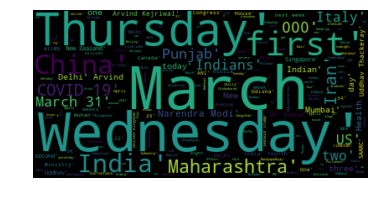

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


wordcloud = WordCloud().generate(str(entities))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [15]:
economic_times_url = 'https://economictimes.indiatimes.com/news/politics-and-nation/coronavirus-cases-in-india-live-news-latest-updates-march17/liveblog/74664903.cms'

In [16]:
response = requests.get(economic_times_url)
soup = BeautifulSoup(response.text,'html.parser')
top_news_container = soup.find('div',class_ = 'pageliveblog')

In [17]:
econ_times_corona_news = []
for news_container in top_news_container.find_all('div',class_ = 'updateText'):
    news = {}
    news_time_tag = news_container.find('div',class_ = 'shareTime')
    time = news_time_tag.find('div',class_ = 'timeStamp').text.replace('\n','')
    #     news['datetime'] = time.text
    news['datetime'] = time
    try:
        headline = news_container.find('h3').text.replace('\n','')
    except:
        headline = ' '
        continue
    try:   
        text = news_container.find('div',class_ = 'blogSysn').text.replace('\n','')
    except:
        text = ' '
        
    news['text'] = headline + ' ' + text
    
    econ_times_corona_news.append(news)

In [18]:
df_economic_times  = pd.DataFrame(econ_times_corona_news)

In [19]:
df_economic_times.head()

,datetime,text
0,12:09 AM,Britain sets out emergency laws to tackle coro...
1,11:36 PM,"Ministry of Health & Family Welfare, Governmen..."
2,11:33 PM,West Bengal reports first positive case of cor...
3,11:31 PM,H&M closes all stores in biggest markets Germa...
4,11:17 PM,Army sources: First positive case of COVID19 c...


In [20]:
df_economic_times.tail()

,datetime,text
54,05:36 PM,Total number of confirmed cases across India r...
55,05:33 PM,A Russian delegation led by Deputy Prime Minis...
56,05:32 PM,Air Force spokesperson Group Captain Anupam Ba...
57,05:31 PM,Uttarakhand govt declares Covid-19 as epidemic...
58,05:27 PM,MP couple quarantined for suspected exposure A...


In [21]:
!pip install selenium

In [22]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome(executable_path='C:/chrome_driver/chromedriver.exe')


In [23]:
import time

driver.get("https://www.cnbctv18.com/healthcare/coronavirus-india-live-updates-coronavirus-live-news-updates-coronavirus-covid-19-pune-maharashtra-mumbai-delhi-noida-uttar-pradesh-bengaluru-gurgaon-coronavirus-cases-in-india-5512961.htm")
more_buttons = driver.find_element_by_link_text('View More')

In [24]:
for x in range(7):
  if more_buttons.is_displayed():
      driver.execute_script("arguments[0].click();", more_buttons)
      time.sleep(7)
page_source = driver.page_source

In [25]:
soup_cnbc = BeautifulSoup(page_source,'lxml')
top_news_container = soup_cnbc.find_all('div',class_ = 'live-blog-row blog-border-red share-post')

In [26]:
cnbc_corona_news = []
for each_news in top_news_container:
    cnbc_news = {}
    
    try:
        cnbc_news['datetime'] = each_news.find('div',class_ = 'date-n-time').get_text().replace('\n','')
        cnbc_news['text'] = each_news.find('div',class_= 'copy').get_text().replace('\n','')
    except:
        continue
    cnbc_corona_news.append(cnbc_news)

In [27]:
top_news_container_2 = soup_cnbc.find_all('div',class_ = 'live-blog-row blog-border-red')
for each_news in top_news_container_2:
    cnbc_news = {}
    
    try:
        cnbc_news['datetime'] = each_news.find('div',class_ = 'date-n-time').get_text().replace('\n','')
        cnbc_news['text'] = each_news.find('div',class_= 'copy').get_text().replace('\n','')
    except:
        continue
    cnbc_corona_news.append(cnbc_news)

In [28]:
df_cnbc  = pd.DataFrame(cnbc_corona_news)

In [29]:
df_cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
datetime    67 non-null object
text        67 non-null object
dtypes: object(2)
memory usage: 1.1+ KB


In [32]:
df_all_news_scraped = pd.concat([df,df_economic_times,df_cnbc],ignore_index=True)

In [33]:
df_all_news_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 2 columns):
datetime    285 non-null object
text        285 non-null object
dtypes: object(2)
memory usage: 4.5+ KB


In [41]:
df_all_news_scraped.to_csv('../Data/corona_news_scraped_on_19th_march.csv',index = False)